In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib.dates as mdates

In [7]:
df=pd.read_csv("D:\Python\Walmart_Sales.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\DELL\AppData\Local\Temp\ipykernel_15084\2960122626.py:1: SyntaxWarning: invalid escape sequence '\P'
  df=pd.read_csv("D:\Python\Walmart_Sales.csv")


In [8]:
df.head

<bound method NDFrame.head of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

         

In [12]:
df.tail

<bound method NDFrame.tail of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

         

In [9]:
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [10]:
df['Date'] = pd.to_datetime(
    df['Date'],
    errors='coerce',          # invalid → NaT
    infer_datetime_format=True
)


C:\Users\DELL\AppData\Local\Temp\ipykernel_15084\2100443186.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(


In [11]:
print(df['Date'].isna().sum()) 

3870


In [12]:
print(df['Date'].min(), df['Date'].max())

2010-01-10 00:00:00 2012-12-10 00:00:00


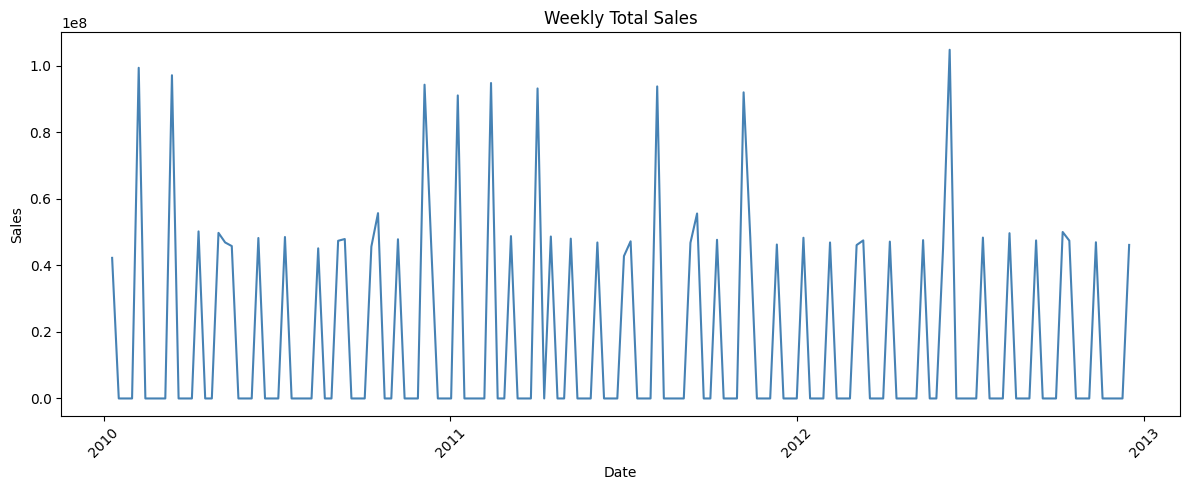

In [15]:
weekly = (
    df.resample('W', on='Date')
      .agg({'Weekly_Sales': 'sum'})
      .reset_index()
)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(weekly['Date'], weekly['Weekly_Sales'], color='steelblue')
ax.set_title("Weekly Total Sales")
ax.set_xlabel("Date")
ax.set_ylabel("Sales")

# nicer x-axis ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
from statsmodels.tsa.stattools import adfuller

In [16]:
result = adfuller(weekly['Weekly_Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.040817466367523
p-value: 0.03125441707450204


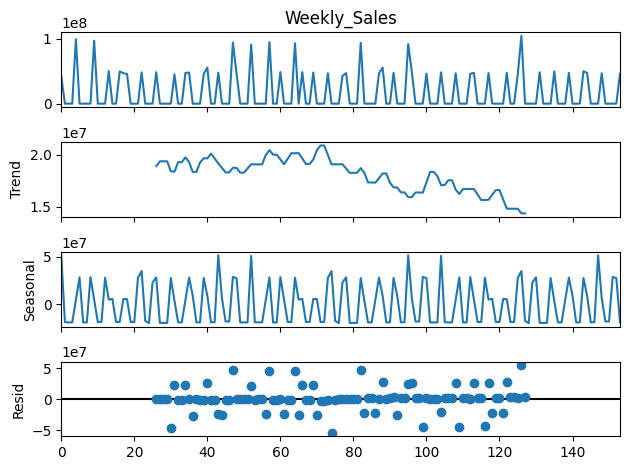

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp = seasonal_decompose(
    weekly['Weekly_Sales'],
    model="additive",
    period=52   # ~ yearly seasonality
)
decomp.plot()
plt.show()


In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [18]:
train = weekly.iloc[:-12]
test  = weekly.iloc[-12:]

model = SARIMAX(
    train['Weekly_Sales'],
    order=(1,0,1),          # (p,d,q) since stationary → d=0
    seasonal_order=(1,0,1,52),  # (P,D,Q,s) s=52 weeks
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = model.fit()
print(sarima_fit.summary())

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  142
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 52)   Log Likelihood               -1640.774
Date:                            Mon, 29 Sep 2025   AIC                           3291.549
Time:                                    11:23:12   BIC                           3303.935
Sample:                                         0   HQIC                          3296.539
                                            - 142                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1455      3.078     -0.047      0.962      -6.178       5.887
ma.L1          0.0757      3.096   

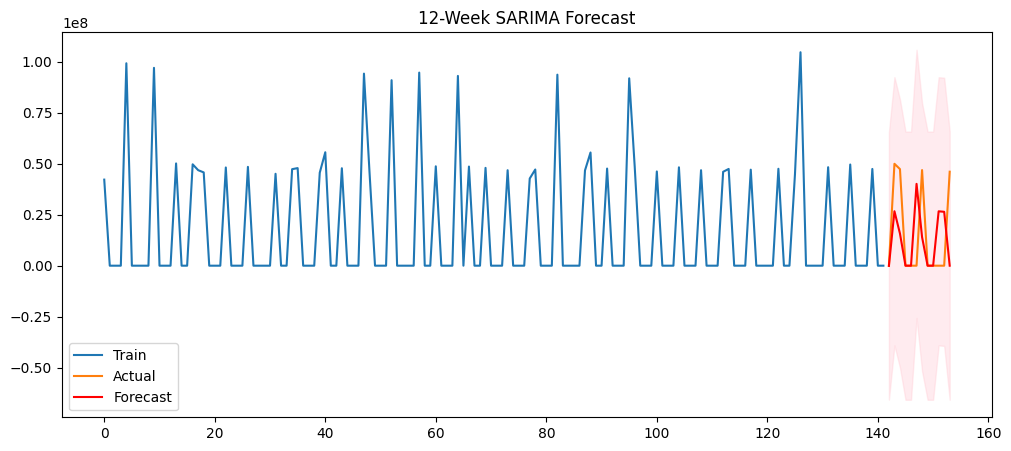

In [19]:
pred = sarima_fit.get_forecast(steps=12)
pred_ci = pred.conf_int()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train.index, train['Weekly_Sales'], label="Train")
plt.plot(test.index,  test['Weekly_Sales'],  label="Actual")
plt.plot(test.index,  pred.predicted_mean,   label="Forecast", color="red")
plt.fill_between(test.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color="pink", alpha=0.3)
plt.legend()
plt.title("12-Week SARIMA Forecast")
plt.show()


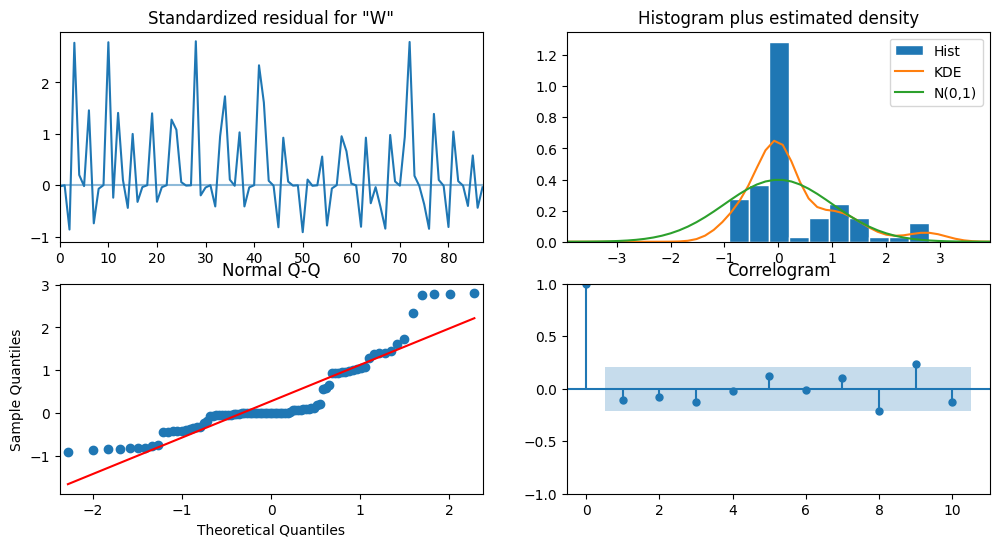

In [20]:
sarima_fit.plot_diagnostics(figsize=(12,6))
plt.show()


In [27]:
pip install prophet 

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 4.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/13.3 MB 4.0 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/13.3 MB 4.0 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/13.3 MB 4.0 MB/s eta 0:00:03
   ----------- ---------------------------- 3.9/13.3 MB 3.9 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/13.3 MB 3.9 MB/s eta 0:00:03
   ---------------- ----------------------- 5.5/13.3 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 6.3/13.3 MB 3.9 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/13.3 MB 3.8 MB/s eta 0:00:02
   ----------------------- ---------------- 7.9/13.3 MB 3.8 MB/s eta 0:00:02
   ------------------------- -------------- 8.7/13.3 MB 3.8 MB/s eta 0:00:02
   --------------------------- ------------ 9.2/13.3 MB 3.7 MB/s eta 0:00:02
   ---

In [30]:
from prophet import Prophet

In [31]:
df_prophet = weekly.reset_index()   # if Date is index
df_prophet = df_prophet.rename(columns={'Date': 'ds',
                                        'Weekly_Sales': 'y'})


In [32]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.fit(df_prophet)


11:30:49 - cmdstanpy - INFO - Chain [1] start processing
11:30:50 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future = m.make_future_dataframe(periods=12, freq='W')
forecast = m.predict(future)


C:\Users\DELL\AppData\Local\Temp\ipykernel_15084\3408509405.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


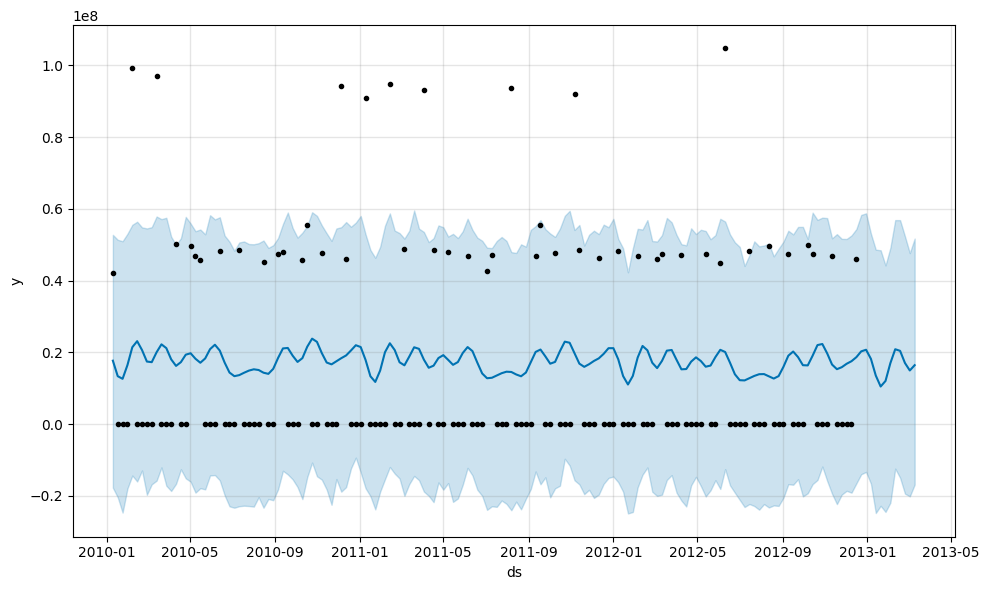

In [34]:
fig1 = m.plot(forecast)
fig1.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15084\1398971050.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


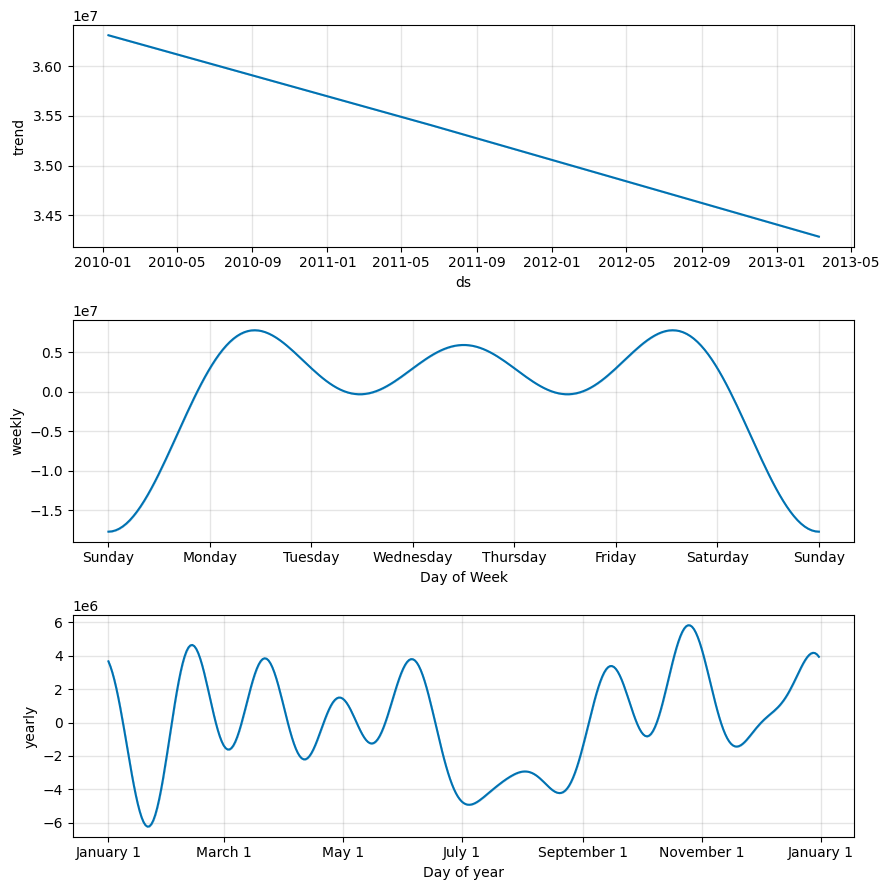

In [35]:
fig2 = m.plot_components(forecast)
fig2.show()


In [39]:
%pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- -

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    weekly['Weekly_Sales'],
    order=(1,1,1),            # you can tweak these
    seasonal_order=(1,1,1,52) # 52 for weekly seasonality
)

sarima_fit = sarima_model.fit()


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [46]:
sarima_pred = sarima_fit.get_forecast(steps=12)
sarima_forecast = sarima_pred.predicted_mean    # <-- this is the Series you need


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

actual        = weekly['Weekly_Sales'][-12:].values
prophet_pred  = forecast.tail(12)['yhat'].values

rmse_sarima  = np.sqrt(mean_squared_error(actual, sarima_forecast.values))
mape_sarima  = mean_absolute_percentage_error(actual, sarima_forecast.values)
rmse_prophet = np.sqrt(mean_squared_error(actual, prophet_pred))
mape_prophet = mean_absolute_percentage_error(actual, prophet_pred)

print(f"SARIMA  RMSE:{rmse_sarima:.2f}, MAPE:{mape_sarima:.2%}")
print(f"Prophet RMSE:{rmse_prophet:.2f}, MAPE:{mape_prophet:.2%}")


SARIMA  RMSE:29530191.97, MAPE:4651839022704503373692928.00%
Prophet RMSE:21803724.05, MAPE:4870140130773935671214080.00%
